# Lecture 1: Direction fields.

A **direction field** (or **slope field**) is a graphical visualization for an ordinary differential equation (ODE) consisting of short line segments which are tangent to the unique solution to the ODE that passes through the midpoint of the line segment.  Given an ODE of the form
\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}x} = f(x,y),
\end{equation}
a direction field can be generated by evaluating $f$ a _mesh_ of points in the $xy$-plane and sketching a line segment with slope $f(x,y)$ at the mesh point $(x,y)$.

## Creating a direction field with NumPy and MatPlotLib.

Check the Help menu above for quick links to documenation pages for the most popular Python packages for scientific computing. 

In [1]:
import numpy as np # imports numpy module and adopts np shorthand
from matplotlib import pyplot as plt # imports numpy module and adopts plt shorthand

Below we use two popular Python libraries to generate a direction field for the ODE
\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}x} = y + \sin x.
\end{equation}

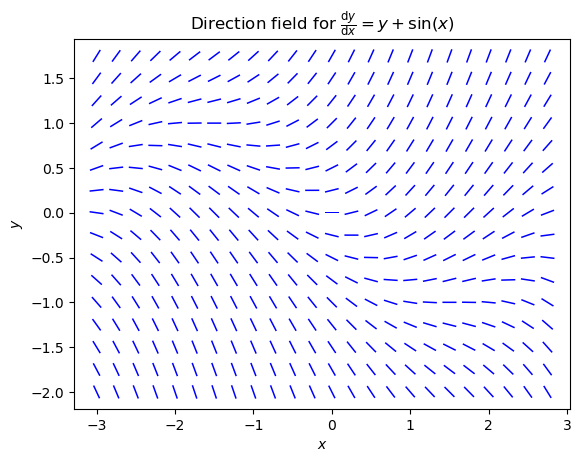

In [2]:
# set step sizes defining the distance between  for x and y
hx, hy = 0.25, 0.25;
# set bounds for x- and y-intervals
xmin, xmax = -3, 3;
ymin, ymax = -2, 2;
# sample x- and y-intervals at appropriate step sizes; explicitly creating array of doubles
xvals = np.arange(xmin, xmax, hx, dtype=np.double);
yvals = np.arange(ymin, ymax, hy, dtype=np.double);
# create rectangle mesh in xy-plane; data for each variable is stored in a separate rectangle array
X, Y = np.meshgrid(xvals, yvals);
dx = np.ones(X.shape); # create a dx=1 at each point of the 2D mesh
dy = Y + np.sin(X);    # sample dy =(dy/dx)*dx, where dx=1 at each point of the 2D mesh
# normalize each vector <dx, dy> so that it has "unit" length
[dx, dy] = [dx, dy]/np.sqrt(dx**2 + dy**2);
# plot "vector field" without arrowheads
dfield = plt.figure();
# NOTE: pivot='mid' anchors the middle of the arrow to the mesh point
# the _nolegend_ flag prevents a legend object from being generated in the later merged graphic
dplot = plt.quiver(X, Y, dx, dy, color="b", headlength=0, headwidth=1, pivot="mid", label='_nolegend_'); 
plt.title(r"Direction field for $\frac{\mathrm{d}y}{\mathrm{d}x} = y+\sin(x)$");
plt.xlabel("$x$");
plt.ylabel("$y$");

## Computing symbolic solutions with SymPy.

In [3]:
import sympy as sp

If the ODE in question can be solved analytically, we can try using the SymPy module to compute the general solution.  The code snippet below demonstrates how to compute the general solution to the ODE
\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}x} = y+\sin x.
\end{equation}

In [4]:
# define symbolic function y and symbolic variable x
x = sp.Symbol('x');
y = sp.Function('y');
# create an Eq object representing the ODE; note that we use the sympy symbolic version of sin(x) here
ode = sp.Eq(y(x).diff(x), sp.sin(x)+y(x));
# solve the ODE for y(x) using sympy's dsolve
gsoln=sp.dsolve(ode, y(x)); gsoln

Eq(y(x), C1*exp(x) - sin(x)/2 - cos(x)/2)

To solve an initial value problem (IVP), one can pass the initial conditions of the problem stored as a Python dictionary.  The code snippet below computes the particular solution to the IVP
\begin{align*}
\frac{\mathrm{d}y}{\mathrm{d}x} &= y+\sin x,\\
y(0)&=-1/2.
\end{align*}

In [5]:
psoln1=sp.dsolve(ode, ics={y(0): -1/2}); psoln1

Eq(y(x), -sin(x)/2 - cos(x)/2)

We can plot the particular solution above on top of the direction field that we created by first converting the result to a lambda function that can be evaluated numerically.

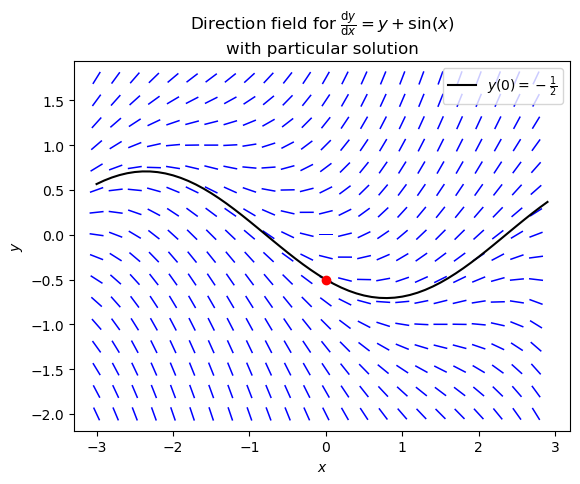

In [6]:
yfunc1=sp.lambdify(x, psoln1.rhs, modules=['numpy']); 
hx = 0.1;
xvals = np.arange(xmin, xmax, hx, dtype=np.double);
plt.figure(dfield) # set the current figure to direction field created above
plt.plot(xvals, yfunc1(xvals), color='k');
plt.title(r"Direction field for $\frac{\mathrm{d}y}{\mathrm{d}x} = y + \sin(x)$" 
             "\n" r"with particular solution");
plt.plot(0,-1/2,'ro') # plot initial condition point (0,-1/2) in red
plt.legend([r"$y(0)=-\frac{1}{2}$"], loc='upper right');
plt.show()